# Excess mortality in Russia during the covid19 pandemics

In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import matplotlib

from matplotlib.patches import Polygon

import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 0

In [2]:
months_eng = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']

months_eng_short = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

months_rus = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
              'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

months_rus_short = ['янв', 'фев', 'мар', 'апр', 'май', 'июн',
                    'июл', 'авг', 'сен', 'окт', 'ноя', 'дек']

## Names, locations, etc. of Russian regions

In [3]:
def rename(regions):
    regions[regions=='Hижегородская область'] = 'Нижегородская область'

    # in EMISS files
    regions[regions=='Город Москва столица Российской Федерации город федерального значения'] = 'Москва'
    regions[regions=='Город Санкт-Петербург город федерального значения'] = 'Санкт-Петербург'
    regions[regions=='Город федерального значения Севастополь'] = 'Севастополь'
    regions[regions=='Ненецкий автономный округ (Архангельская область)'] = 'Ненецкий АО'
    regions[regions=='Архангельская область (кроме Ненецкого автономного округа)'] = 'Архангельская область без АО'
    regions[regions=='Ханты-Мансийский автономный округ - Югра (Тюменская область)'] = 'Ханты-Мансийский АО'
    regions[regions=='Ямало-Ненецкий автономный округ (Тюменская область)'] = 'Ямало-Hенецкий АО'
    regions[regions=='Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)'] = 'Тюменская область без АО'
    regions[regions=='Чукотский автономный округ'] = 'Чукотский АО'
    regions[regions=='Еврейская автономная область'] = 'Еврейская АО'
    regions[regions=='Республика Адыгея (Адыгея)'] = 'Республика Адыгея'
    regions[regions=='Республика Татарстан (Татарстан)'] = 'Республика Татарстан' 
    regions[regions=='Чувашская Республика - Чувашия'] = 'Чувашская Республика'
    regions[regions=='Республика Северная Осетия-Алания'] = 'Северная Осетия'
    regions[regions=='Республика Саха (Якутия)'] = 'Якутия'
    regions[regions=='Кабардино-Балкарская Республика'] = 'Кабардино-Балкария'
    regions[regions=='Карачаево-Черкесская Республика'] = 'Карачаево-Черкесия'
    regions[regions=='Кемеровская область - Кузбасс'] = 'Кемеровская область'
    
    # in addition in Rosstat files
    regions[regions=='г.Москва'] = 'Москва'
    regions[regions=='г.Санкт-Петербург'] = 'Санкт-Петербург'
    regions[regions=='г.Севастополь'] = 'Севастополь'
    regions[regions=='Hенецкий авт.округ'] = 'Ненецкий АО'
    regions[regions=='Архангельская область без автономии'] = 'Архангельская область без АО'
    regions[regions=='Ханты-Мансийский авт.округ-Югра'] = 'Ханты-Мансийский АО'
    regions[regions=='Ямало-Hенецкий авт.округ'] = 'Ямало-Hенецкий АО'
    regions[regions=='Тюменская область без автономии'] = 'Тюменская область без АО'
    regions[regions=='Чукотский авт.округ'] = 'Чукотский АО'
    regions[regions=='Республика Татарстан(Татарстан)'] = 'Республика Татарстан'
    regions[regions=='Чувашская Республика(Чувашия)'] = 'Чувашская Республика'
    regions[regions=='Республика Северная Осетия- Алания'] = 'Северная Осетия'
    
    # in addition in Stopcoronavirus files
    regions[regions=='Ненецкий автономный округ'] = 'Ненецкий АО'
    regions[regions=='Республика Северная Осетия — Алания'] = 'Северная Осетия'
    regions[regions=='Республика Чувашия'] = 'Чувашская Республика'
    regions[regions=='Чукотский автономный округ'] = 'Чукотский АО'
    regions[regions=='Ямало-Ненецкий автономный округ'] = 'Ямало-Hенецкий АО'
    if 'Архангельская область без АО' not in regions:
        regions[regions=='Архангельская область'] = 'Архангельская область без АО'
        regions[regions=='Тюменская область'] = 'Тюменская область без АО'
        
    return regions

In [4]:
regions_table = {'Алтайский край':[3,12], 'Амурская область':[2,15],
       'Архангельская область без АО':[1,8], 'Астраханская область':[7,7],
       'Белгородская область':[6,4], 'Брянская область':[4,2], 'Владимирская область':[3,5],
       'Волгоградская область':[6,6], 'Вологодская область':[1,5],
       'Воронежская область':[6,5], 'Еврейская АО':[3,15], 'Забайкальский край':[1,15],
       'Ивановская область':[2,5], 'Иркутская область':[1,14], 'Кабардино-Балкария':[9,4],
       'Калининградская область':[1,0], 'Калужская область':[3,2], 'Камчатский край':[1,17],
       'Карачаево-Черкесия':[8,4], 'Кемеровская область':[1,13], 'Кировская область':[2,8],
       'Костромская область':[2,6], 'Краснодарский край':[7,4], 'Красноярский край':[0,13],
       'Курганская область':[2,11], 'Курская область':[5,3], 'Ленинградская область':[1,3],
       'Липецкая область':[5,4], 'Магаданская область':[1,16], 'Москва':[3,3],
       'Московская область':[3,4], 'Мурманская область':[0,4], 'Ненецкий АО':[0,9],
       'Нижегородская область':[3,6], 'Новгородская область':[1,4],
       'Новосибирская область':[2,12], 'Омская область':[3,11], 'Оренбургская область':[5,8],
       'Орловская область':[4,3], 'Пензенская область':[5,6], 'Пермский край':[2,9],
       'Приморский край':[3,16], 'Псковская область':[2,2], 'Республика Адыгея':[8,3],
       'Республика Алтай':[4,12], 'Республика Башкортостан':[4,9],
       'Республика Бурятия':[2,14], 'Республика Дагестан':[8,7],
       'Республика Ингушетия':[9,6], 'Республика Калмыкия':[7,6],
       'Республика Карелия':[0,3], 'Республика Коми':[1,9], 'Республика Крым':[7,3],
       'Республика Марий Эл':[2,7], 'Республика Мордовия':[4,6],
       'Республика Татарстан':[3,8], 'Республика Тыва':[3,13], 'Республика Хакасия':[2,13],
       'Ростовская область':[7,5], 'Рязанская область':[4,5], 'Самарская область':[4,8],
       'Санкт-Петербург':[1,2], 'Саратовская область':[5,7], 'Сахалинская область':[3,17],
       'Свердловская область':[2,10], 'Севастополь':[7,2], 'Северная Осетия':[9,5],
       'Смоленская область':[3,1], 'Ставропольский край':[8,5], 'Тамбовская область':[5,5],
       'Тверская область':[2,3], 'Томская область':[1,12], 'Тульская область':[4,4],
       'Тюменская область без АО':[1,11], 'Удмуртская Республика':[3,9],
       'Ульяновская область':[4,7], 'Хабаровский край':[2,16], 'Ханты-Мансийский АО':[1,10],
       'Челябинская область':[3,10], 'Чеченская Республика':[8,6],
       'Чувашская Республика':[3,7], 'Чукотский АО':[0,17], 'Якутия':[3,14],
       'Ямало-Hенецкий АО':[0,10], 'Ярославская область':[2,4]}

regions_short = ['Российская Федерация', 'Белгородская', 'Брянская',
       'Владимирская', 'Воронежская',
       'Ивановская', 'Калужская', 'Костромская',
       'Курская', 'Липецкая', 'Московская',
       'Орловская', 'Рязанская', 'Смоленская',
       'Тамбовская', 'Тверская', 'Тульская',
       'Ярославская', 'Москва', 'Карелия',
       'Коми', 'Ненецкий АО', 'Архангельская',
       'Вологодская', 'Калининградская',
       'Ленинградская', 'Мурманская',
       'Новгородская', 'Псковская', 'Петербург',
       'Адыгея', 'Калмыкия', 'Крым',
       'Краснодарский', 'Астраханская',
       'Волгоградская', 'Ростовская', 'Севастополь',
       'Дагестан', 'Ингушетия',
       'Каб-Балкария', 'Кар-Черкесия', 'Сев Осетия',
       'Чеченская', 'Ставропольский',
       'Башкортостан', 'Марий Эл',
       'Мордовия', 'Татарстан',
       'Удмуртия', 'Чувашия', 'Пермский',
       'Кировская', 'Нижегородская',
       'Оренбургская', 'Пензенская', 'Самарская',
       'Саратовская', 'Ульяновская', 'Курганская',
       'Свердловская', 'Ханты-Манс АО', 'Ямало-Hен АО',
       'Тюменская', 'Челябинская',
       'Алтай', 'Тыва', 'Хакасия',
       'Алтайский', 'Красноярский', 'Иркутская',
       'Кемеровская', 'Новосибирская', 'Омская',
       'Томская', 'Бурятия', 'Якутия',
       'Забайкальский', 'Камчатский', 'Приморский',
       'Хабаровский', 'Амурская', 'Магаданская',
       'Сахалинская', 'Еврейская АО', 'Чукотский АО']

In [5]:
coordinates={}
coordinates['Белгородская область'               ] = [145,575]
coordinates['Брянская область'                   ] = [140,510]
coordinates['Владимирская область'               ] = [245,530]
coordinates['Воронежская область'                ] = [170,590]
coordinates['Ивановская область'                 ] = [265,515]
coordinates['Калужская область'                  ] = [170,505]
coordinates['Костромская область'                ] = [300,500]
coordinates['Курская область'                    ] = [140,545]
coordinates['Липецкая область'                   ] = [180,560]
coordinates['Московская область'                 ] = [214,500]
coordinates['Орловская область'                  ] = [165,535]
coordinates['Рязанская область'                  ] = [220,550]
coordinates['Смоленская область'                 ] = [160,475]
coordinates['Тамбовская область'                 ] = [210,580]
coordinates['Тверская область'                   ] = [190,455]
coordinates['Тульская область'                   ] = [185,530]
coordinates['Ярославская область'                ] = [260,480]
coordinates['Москва'                             ] = [60, 460]
coordinates['Республика Карелия'                 ] = [290,360]
coordinates['Республика Коми'                    ] = [440,470]
coordinates['Ненецкий АО'                        ] = [480,400]
coordinates['Архангельская область без АО'       ] = [340,420]
coordinates['Вологодская область'                ] = [290,460]
coordinates['Калининградская область'            ] = [80,380]
coordinates['Ленинградская область'              ] = [240,410]
coordinates['Мурманская область'                 ] = [360,310]
coordinates['Новгородская область'               ] = [210,425]
coordinates['Псковская область'                  ] = [170,410]
coordinates['Санкт-Петербург'                    ] = [200,370]
coordinates['Республика Адыгея'                  ] = [90,690]
coordinates['Республика Калмыкия'                ] = [170,705]
coordinates['Краснодарский край'                 ] = [92,660]
coordinates['Астраханская область'               ] = [205,710]
coordinates['Волгоградская область'              ] = [195,645]
coordinates['Ростовская область'                 ] = [140,650]
coordinates['Республика Дагестан'                ] = [146,792]
coordinates['Республика Ингушетия'               ] = [127,760]
coordinates['Кабардино-Балкария'                 ] = [110,735]
coordinates['Карачаево-Черкесия'                 ] = [95,720]
coordinates['Северная Осетия'                    ] = [115,750]
coordinates['Чеченская Республика'               ] = [140,760]
coordinates['Ставропольский край'                ] = [125,710]
coordinates['Республика Башкортостан'            ] = [365,650]
coordinates['Республика Марий Эл'                ] = [320,560]
coordinates['Республика Мордовия'                ] = [250,570]
coordinates['Республика Татарстан'               ] = [320,600]
coordinates['Удмуртская Республика'              ] = [360,580]
coordinates['Чувашская Республика'               ] = [290,575]
coordinates['Пермский край'                      ] = [410,560]
coordinates['Кировская область'                  ] = [350,540]
coordinates['Нижегородская область'              ] = [270,550]
coordinates['Оренбургская область'               ] = [320,660]
coordinates['Пензенская область'                 ] = [250,600]
coordinates['Самарская область'                  ] = [300,630]
coordinates['Саратовская область'                ] = [250,640]
coordinates['Ульяновская область'                ] = [275,600]
coordinates['Курганская область'                 ] = [460,660]
coordinates['Свердловская область'               ] = [460,600]
coordinates['Ханты-Мансийский АО'                ] = [550,550]
coordinates['Ямало-Hенецкий АО'                  ] = [630,510]
coordinates['Тюменская область без АО'           ] = [510,640]
coordinates['Челябинская область'                ] = [420,660]
coordinates['Республика Алтай'                   ] = [700,800]
coordinates['Республика Бурятия'                 ] = [980,720]
coordinates['Республика Тыва'                    ] = [810,790]
coordinates['Республика Хакасия'                 ] = [750,755]
coordinates['Алтайский край'                     ] = [650,770]
coordinates['Забайкальский край'                 ] = [1060,710]
coordinates['Красноярский край'                  ] = [790,520]
coordinates['Иркутская область'                  ] = [900,670]
coordinates['Кемеровская область'                ] = [710,725]
coordinates['Новосибирская область'              ] = [620,710]
coordinates['Омская область'                     ] = [560,680]
coordinates['Томская область'                    ] = [660,650]
coordinates['Якутия'                             ] = [1030,430]
coordinates['Камчатский край'                    ] = [1390,360]
coordinates['Приморский край'                    ] = [1340,730]
coordinates['Хабаровский край'                   ] = [1200,510]
coordinates['Амурская область'                   ] = [1160,630]
coordinates['Магаданская область'                ] = [1250,320]
coordinates['Сахалинская область'                ] = [1355,575]
coordinates['Еврейская АО'                       ] = [1265,690]
coordinates['Чукотский АО'                       ] = [1260,150]
coordinates['Республика Крым'                    ] = [35,620]
coordinates['Севастополь'                        ] = [20,625]

In [6]:
regionsToEnglish = {'Москва':'Moscow', 
                    'Московская область':'Moscow Oblast',
                    'Санкт-Петербург':'St. Petersburg',       
                    'Республика Татарстан':'Tatarstan',
                    'Республика Башкортостан':'Bashkortostan',
                    'Краснодарский край':'Krasnodar Krai',
                    'Свердловская область':'Sverdlovsk Oblast',
                    'Самарская область':'Samara Oblast',
                    'Республика Дагестан':'Dagestan',
                    'Челябинская область':'Chelyabinsk Oblast',
                    'Нижегородская область':'Nizhny Novgorod Oblast',
                    'Ростовская область':'Rostov Oblast',
                    'Волгоградская область':'Volgograd Oblast',
                    'Ленинградская область':'Leningrad Oblast',
                    'Пензенская область':'Penza Oblast',
                    'Оренбургская область':'Orenburg Oblast',
                    'Новосибирская область':'Novosibirsk Oblast',
                    'Пермский край':'Perm Krai',
                   }

regionsToEnglishShort = {
                    'Москва':'Moscow', 
                    'Московская область':'Moscow Oblast',
                    'Санкт-Петербург':'St. Petersburg',       
                    'Республика Татарстан':'Tatarstan',
                    'Республика Башкортостан':'Bashkortostan',
                    'Краснодарский край':'Krasnodar Krai',
                    'Свердловская область':'Sverdlovsk O.',
                    'Самарская область':'Samara O.',
                    'Республика Дагестан':'Dagestan',
                    'Челябинская область':'Chelyabinsk O.',
                    'Нижегородская область':'N. Novgorod O.',
                    'Ростовская область':'Rostov O.',
                    'Волгоградская область':'Volgograd O.',
                    'Ленинградская область':'Leningrad O.',
                    'Пензенская область':'Penza O.',
                    'Оренбургская область':'Orenburg O.',
                    'Новосибирская область':'Novosibirsk O.',
                    'Пермский край':'Perm Krai',
                        }

## Load data

Data sources:

* https://www.fedstat.ru/indicator/33556

* https://www.fedstat.ru/indicator/31556

* https://rosstat.gov.ru/storage/mediabank/ldMWepjj/edn11-2020.htm

* https://docs.google.com/spreadsheets/d/1nCxvNcuZGNswsf97mliLikmUIsOrOGZtL-VI7xfN-Zw (scraped by Sergey Shpilkin)

In [7]:
table = pd.read_excel('russian-data/data.xls')

regions = table.values[3:,0]
regions = np.array([r.strip(' *') for r in regions])

deaths = table.values[3:,1:].astype(float)

# fill in fields that are empty for some years for unclear reasons
deaths[regions=='Архангельская область (кроме Ненецкого автономного округа)',:] = \
    deaths[regions=='Архангельская область',:] - \
    deaths[regions=='Ненецкий автономный округ (Архангельская область)',:]

deaths[regions=='Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)',:] = \
    deaths[regions=='Тюменская область',:] - \
    deaths[regions=='Ханты-Мансийский автономный округ - Югра (Тюменская область)',:] - \
    deaths[regions=='Ямало-Ненецкий автономный округ (Тюменская область)',:]

kickout = np.isnan(deaths[:,-1])
kickout |= np.array(['федеральный округ' in r for r in regions])
kickout |= np.isin(regions, ['Архангельская область', 'Тюменская область'])

regions = regions[~kickout]
deaths = deaths[~kickout]

regions = rename(regions)

assert(all(deaths[0] == np.nansum(deaths[1:],axis=0)))

In [8]:
deaths_year = np.zeros((regions.size, 15, 12)) * np.nan
for y in range(14):
    deaths_year[:,y,:] = deaths[:, y*12:(y+1)*12]
deaths_year[:,14,:deaths.shape[1]-14*12] = deaths[:, 14*12:]

deaths = deaths_year

In [9]:
# Append last months

d = pd.read_excel('russian-data/edn10_2020.xlsx', sheet_name='t1_1')
r = d.values[:,0][4:]
d = d.values[:,5][4:]
r = np.array([a.strip() for a in r])
r = rename(r)

for i,reg in enumerate(regions):
    deaths[i,-1,9] = d[r==reg][0]
    
d = pd.read_excel('russian-data/edn11_2020.xlsx', sheet_name='t1_1')
r = d.values[:,0][4:]
d = d.values[:,5][4:]
r = np.array([a.strip() for a in r])
r = rename(r)

for i,reg in enumerate(regions):
    deaths[i,-1,10] = d[r==reg][0]

In [10]:
print(deaths[0,-1])

[164075. 143179. 152740. 150873. 172914. 162758. 181479. 157181. 170717.
 205456. 219872.     nan]


In [11]:
covid_deaths = np.zeros((regions.size, 12, 4))

files = ['edn04_2020.xlsx', 'edn05_2020.xlsx', 'edn06_2020.xlsx',
         'edn07_2020.xlsx', 'edn08_2020.xlsx', 'edn09_2020.xlsx',
         'edn10_2020.xlsx', 'edn11_2020.xlsx']
sheets = ['5.1', '5_1', '5_1', 't5_1', '5.1', '5.1', '5.1', 't5_1']
fromrow = [6,5,6,6,6,6,5,5]

for month, (file, sheet, row) in enumerate(zip(files, sheets, fromrow)):
    d = pd.read_excel('russian-data/'+file, sheet_name=sheet)
    r = d.values[:,0][row:-1]
    d = d.values[:,[2,3,5,6]][row:-1,:]
    r = np.array([a.strip() for a in r])
    r = rename(r)
    for i,reg in enumerate(regions):
        covid_deaths[i,3+month,:] = d[r==reg][0]

covid_deaths[np.isnan(covid_deaths)] = 0
    
assert(np.all(covid_deaths[0] == np.sum(covid_deaths[1:,:,:], axis=0)))

print(np.sum(covid_deaths,axis=0), '\n')
print(np.sum(covid_deaths[0],axis=0), '\n')
print(np.sum(covid_deaths[0]))

[[    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [    0.     0.     0.     0.]
 [ 2700.   796.   870.  1284.]
 [11852.  3354.  3218.  6914.]
 [11650.  2984.  2968.  7068.]
 [10126.  2042.  2474.  6100.]
 [ 6872.  1164.  2368.  4942.]
 [ 9158.  1718.  2856.  6626.]
 [26154.  4052.  3588. 14872.]
 [39252.  7968.  4356. 19714.]
 [    0.     0.     0.     0.]] 

[58882. 12039. 11349. 33760.] 

116030.0


In [12]:
table = pd.read_excel('russian-data/data_population.xls')

r = table.values[2:,0]
r = np.array([a.strip(' *') for a in r])
r = rename(r)
pop = table.values[2:,2].astype(float)

population = np.zeros(regions.size)
for i,reg in enumerate(regions):
    population[i] = pop[r==reg][0]

In [13]:
table = pd.read_csv('russian-data/StopCoronaRF - died.csv')
off = table.values[:,table.columns=='01.12.2020'].flatten()
r = table.values[:,0]
r = rename(r)

official_deaths = np.zeros(regions.size)
official_deaths_monthly = np.zeros((regions.size, 12))
for i,reg in enumerate(regions):
    if reg != 'Российская Федерация':
        official_deaths[i] = off[r==reg][0]
        for m in range(12):
            if f'01.{m+2:02d}.2020' in table.columns and f'01.{m+1:02d}.2020' in table.columns:
                official_deaths_monthly[i,m] = \
                    table.values[:,table.columns==f'01.{m+2:02d}.2020'].flatten()[r==reg][0] - \
                    table.values[:,table.columns==f'01.{m+1:02d}.2020'].flatten()[r==reg][0]
            else:
                official_deaths_monthly[i,m] = np.nan
official_deaths[regions=='Российская Федерация'] = np.sum(official_deaths)
official_deaths_monthly[regions=='Российская Федерация',:] = np.sum(official_deaths_monthly,axis=0)

print(official_deaths[0])
print(official_deaths_monthly[0])

40464.0
[   nan    nan    nan  1145.  3686.  4681.  4522.  3241.  3592.  7344.
 12229.    nan]


## Compute excess deaths

In [14]:
# Compared to 2019
deaths_model = deaths[:,-2,:]
excess = deaths[:,-1,:] - deaths_model
total = np.nansum(excess[:,3:], axis=1)
print(total[0])

# Compared to the 2017-19 avearge
deaths_model = np.mean(deaths[:,-4:-1,:], axis=1)
excess = deaths[:,-1,:] - deaths_model
total = np.nansum(excess[:,3:], axis=1)
print(total[0])

# Compared to the 2015-19 average
deaths_model = np.mean(deaths[:,-6:-1,:], axis=1)
excess = deaths[:,-1,:] - deaths_model
total = np.nansum(excess[:,3:], axis=1)
print(total[0])

242598.0
230763.33333333334
212433.4


In [15]:
from scipy import stats

yearly = np.mean(deaths,axis=2)
for r in range(yearly.shape[0]):
    b = stats.linregress(np.arange(2015, 2020), yearly[r,-6:-1])
    yearly[r,-1] = b.intercept + b.slope * 2020
    
monthly = np.nanmedian(deaths[:,:-1,:] - yearly[:,:-1,np.newaxis], axis=1)

deaths_model = monthly + yearly[:,-1][:,np.newaxis]

excess = deaths[:,-1,:] - deaths_model
total = np.nansum(excess[:,3:], axis=1)

ratio = excess / deaths_model
maxratio = np.nanmax(ratio,axis=1)
fullratio = total / np.sum(deaths_model[:,~np.isnan(ratio[0])][:,3:], axis=1)
yearratio = total / np.sum(deaths_model, axis=1)

excess_permln = excess / population[:,np.newaxis] * 1e+6
total_permln  = total / population * 1e+6

print(np.round(excess[0,:]))
print(f'{total[0]:.0f}')
print(' '.join([f'{r*100:.0f}%' for r in ratio[0]]))
print(' '.join([f'{r:.1f}' for r in excess[0]/official_deaths_monthly[0]]))
print(f'{np.sum(total[1:]):.0f}')
print(f'{total_permln[0]:.0f}')
print(f'{fullratio[0]*100:.1f}%')
print(f'{yearratio[0]*100:.1f}%')

print(f'{np.nansum(excess[0,:]):.0f}')

[  511.  1536. -3902.  4771. 21070. 18950. 34728. 14410. 33590. 56120.
 80461.    nan]
264100
0% 1% -2% 3% 14% 13% 24% 10% 24% 38% 58% nan%
nan nan nan 4.2 5.7 4.0 7.7 4.4 9.4 7.6 6.6 nan
266709
1799
22.8%
15.0%
262245


In [16]:
# Export

b = np.where(np.isnan(deaths[0,-1,:]))[0][0]
df = pd.DataFrame(np.round(excess[:,:b]).astype(int))
df.index = regions
df.columns = months_rus[:b]
df.to_csv('russia_excess_deaths.csv')

In [17]:
r=0

X = np.concatenate((np.ones((5,1)), np.arange(2015,2020)[:,np.newaxis]), axis=1)
y = yearly[r,-6:-1][:,np.newaxis]
b = np.linalg.inv(X.T @ X) @ X.T @ y
yhat = X @ b
sigma2 = np.sum((y-yhat)**2) / (5-2)
x = np.array([[1], [2020]])
yhat = b.T @ x
print(yhat[0][0])

predictive_var = sigma2 * (1 + x.T @ np.linalg.inv(X.T @ X) @ x)
predictive_std = np.sqrt(predictive_var)[0][0]

print(predictive_std)

a = 3
b = np.where(np.isnan(deaths[r,-1,:]))[0][0]
print(predictive_std*(b-a))
print(predictive_std*(b-a)*np.array([-1.96,1.96]) + total[0])

147164.28328810912
2048.718950118371
16389.75160094697
[231975.77852881 296223.60480452]


## Technical figures

<IPython.core.display.Javascript object>


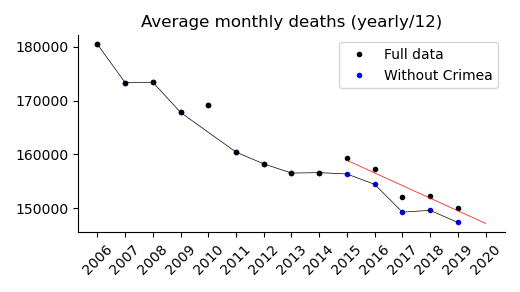

In [18]:
r = 0

fig = plt.figure(figsize=(8*.65, 4.5*.65))
plt.plot(np.arange(2006,2020), yearly[r][:-1],'k.')

excl = ['Российская Федерация', 'Республика Крым', 'Севастополь']
plt.plot(np.arange(2006,2020), 
         np.nansum(yearly[[r not in excl for r in regions],:-1], axis=0), 'b.',zorder=-1)

plt.plot(np.arange(2006,2020)[np.arange(2006,2020)!=2010], 
         np.nansum(yearly[[r not in excl for r in regions],:-1], axis=0)[np.arange(2006,2020)!=2010], 
         'k-',zorder=-1, lw=.5)

# plt.plot(2020, np.nanmean(deaths[r,-1,:]),'r.')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# xs = np.linspace(2006,2020,1000).reshape(-1,1)
# model = make_pipeline(PolynomialFeatures(2), LinearRegression())
# ys = model.fit(np.arange(2006,2020).reshape(-1,1), yearly[r][:-1]).predict(xs)
# plt.plot(xs, ys, 'g', lw=.5)

# model = make_pipeline(PolynomialFeatures(1), LinearRegression())
# ys = model.fit(np.arange(2006,2020).reshape(-1,1), yearly[r][:-1]).predict(xs)
# plt.plot(xs, ys, 'r', lw=.5)

xs = np.linspace(2015,2020,1000).reshape(-1,1)
model = make_pipeline(PolynomialFeatures(1), LinearRegression())
ys = model.fit(np.arange(2015,2020).reshape(-1,1), yearly[r][-6:-1]).predict(xs)
plt.plot(xs, ys, color='r', lw=.5)

# plt.title(f'Average monthly deaths: {regions[r]}')
plt.title(f'Average monthly deaths (yearly/12)')
plt.xticks(np.arange(2006,2021), rotation=45)
sns.despine()
plt.tight_layout()

plt.legend(['Full data', 'Without Crimea'])

plt.savefig('img/average-monthly.png', dpi=200)

<IPython.core.display.Javascript object>


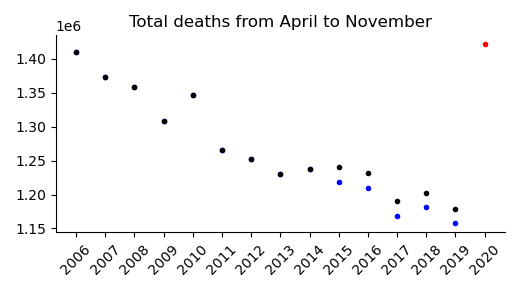

In [19]:
excl = ['Российская Федерация', 'Республика Крым', 'Севастополь']

r = 0
fig = plt.figure(figsize=(8*.65, 4.5*.65))
plt.plot(np.arange(2006,2020), np.sum(deaths[r,:-1,3:11], axis=1),'k.')
plt.plot(np.arange(2006,2020), 
         np.nansum(deaths[[r not in excl for r in regions],:-1,3:11], axis=(0,2)), 'b.',zorder=-1)
plt.plot(2020, np.sum(deaths[r,-1,3:11]), 'r.')
plt.title('Total deaths from April to November')
plt.xticks(np.arange(2006,2021), rotation=45)
sns.despine()
plt.tight_layout()

<IPython.core.display.Javascript object>


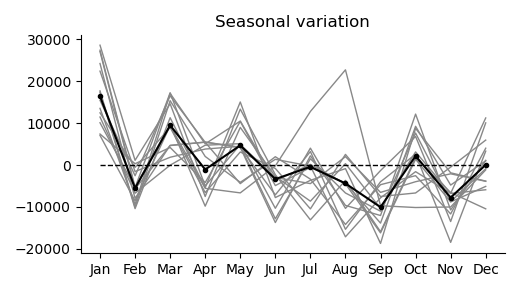

In [20]:
fig = plt.figure(figsize=(8*.65, 4.5*.65))

plt.plot((deaths[0,:-1,:] - yearly[0,:-1,np.newaxis]).T, '#888888', lw=1)
plt.plot(monthly[0], 'k.-', lw=1.5)
plt.plot([0,11],[0,0], 'k--', lw=1)
plt.xticks(np.arange(12), months_eng_short)
plt.title('Seasonal variation')

sns.despine()
plt.tight_layout()
plt.savefig('img/monthly-deviations.png', dpi=200)

<IPython.core.display.Javascript object>


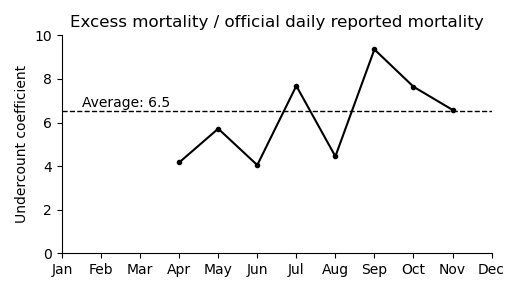

In [21]:
fig = plt.figure(figsize=(8*.65, 4.5*.65))

r = excess[0]/official_deaths_monthly[0]
plt.plot(r, 'k.-')
plt.ylabel('Undercount coefficient')
plt.title('Excess mortality / official daily reported mortality')
plt.xticks(np.arange(12), months_eng_short)
plt.ylim([0,10])
plt.xlim([0,11])

r = total[0]/official_deaths[0]
plt.plot([0,11], [r,r], 'k--', lw=1)
plt.text(.5, r+.2, f'Average: {r:.1f}', fontsize=10)

sns.despine()
plt.tight_layout()
plt.savefig('img/undercount.png', dpi=200)

## Space to look up some numbers

In [22]:
# covid_deaths[regions=='Чукотский АО']

In [23]:
# official_deaths_monthly[regions=='Чукотский АО']

In [24]:
# excess[regions=='Чукотский АО']

In [25]:
# total[regions=='Чукотский АО']

In [26]:
# deaths_model[regions=='Чукотский АО']

## Figures: excess mortality time series

<IPython.core.display.Javascript object>


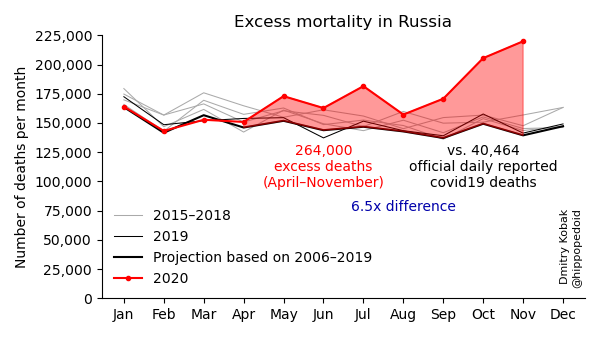

In [27]:
fig = plt.figure(figsize=(8*.75,4.5*.75))

r=0
plt.plot(deaths[r, -6:-3, :].T, linewidth=.75, color='#aaaaaa', label='')
plt.plot(deaths[r, -3, :].T, linewidth=.75, color='#aaaaaa', label='2015–2018')
plt.plot(deaths[r, -2, :], linewidth=.75, color='k', label='2019')
plt.plot(deaths_model[r,:], 'k', linewidth=1.5, label='Projection based on 2006–2019')
plt.plot(deaths[r, -1, :], 'r.-', linewidth=1.5, label='2020')
plt.legend(frameon=False)

a = 3
b = np.where(np.isnan(deaths[r,-1,:]))[0][0]
poly = np.zeros(((b-a)*2, 2))
poly[:,0] = np.concatenate((np.arange(a,b), np.arange(b-1,a-1,-1)))
poly[:,1] = np.concatenate((deaths[r,-1,a:b], deaths_model[r,a:b][::-1]))
poly = Polygon(poly, facecolor='r', edgecolor='r', alpha=.4, zorder=5)
plt.gca().add_patch(poly)

plt.text(5,95000,f'{np.round(total[0]/1000)*1000:,.0f}\nexcess deaths\n(April–{months_eng[b-1]})',
         color='r', ha='center')
plt.text(9,95000,f'vs. {official_deaths[0]:,.0f}\nofficial daily reported\ncovid19 deaths',
         color='k', ha='center')
plt.text(7,75000,f'{total[0]/official_deaths[0]:,.1f}x difference',
         color='#0000aa', ha='center')

plt.ylabel('Number of deaths per month')
plt.title('Excess mortality in Russia')
plt.gca().get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(np.arange(12), months_eng_short)
plt.ylim([0,225000])

fig.text(.97,.15, 'Dmitry Kobak\n@hippopedoid', size=8, ha='right', rotation=90)

sns.despine()
plt.tight_layout()

plt.savefig('img/russia.png', dpi=200)

<IPython.core.display.Javascript object>


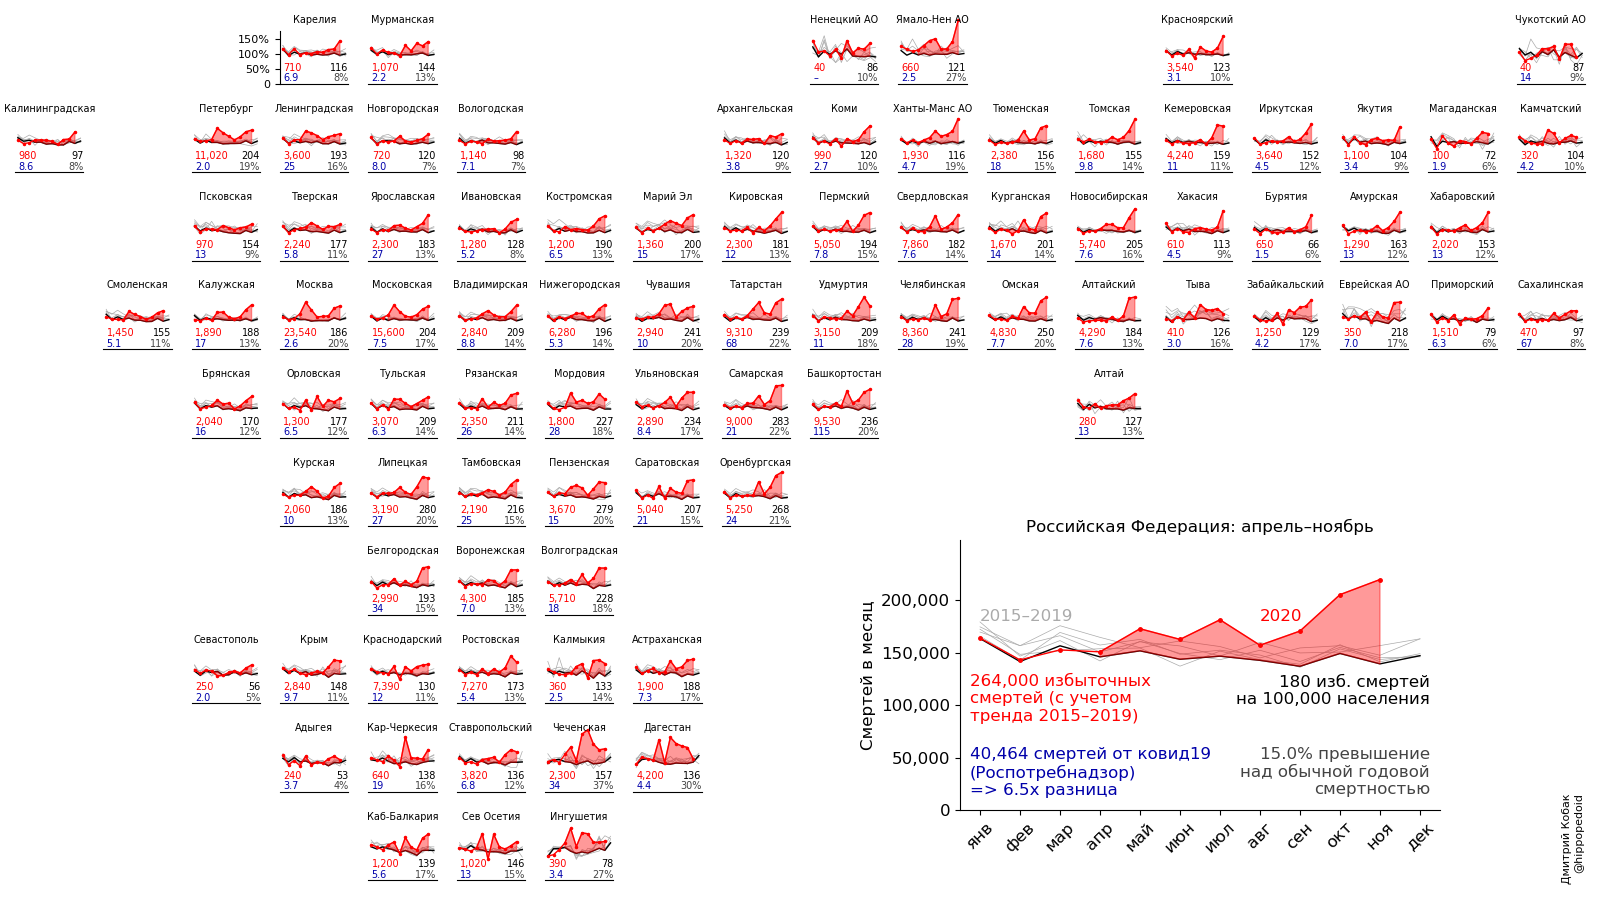

In [28]:
def allregions():
    fig = plt.figure(figsize=(8*2, 4.5*2))

    axs = [None]
    for r,reg in enumerate(regions[1:],1):
        ax = plt.subplot(10,18,regions_table[reg][0]*18+regions_table[reg][1]+1)
        axs.append(ax)
    
        plt.plot(deaths[r, -6:-1, :].T, color='#aaaaaa', linewidth=.5, clip_on=False)
        plt.plot(deaths_model[r,:], 'k', linewidth=1, clip_on=False)
        plt.plot(deaths[r, -1, :], 'r.-', linewidth=1, markersize=3, clip_on=False)
    
        a = 3
        b = np.where(np.isnan(deaths[r,-1,:]))[0][0]
        poly = np.zeros(((b-a)*2, 2))
        poly[:,0] = np.concatenate((np.arange(a,b), np.arange(b-1,a-1,-1)))
        poly[:,1] = np.concatenate((deaths[r,-1,a:b], deaths_model[r,a:b][::-1]))
        poly = Polygon(poly, facecolor='r', edgecolor='r', alpha=.4, zorder=5, clip_on=False)
        plt.gca().add_patch(poly)
        
#         forecast = excess[r,b-1]/official_deaths_monthly[r,b-1] * \
#             official_deaths_monthly[r,b] + deaths_model[r,b]
#         plt.plot([b-1,b], [deaths[r, -1, b-1], forecast], 'k', linewidth=.75)
    
        plt.xticks([])
        ym = np.mean(deaths_model[r,])
        plt.ylim([0, ym*1.75])
        plt.xlim([-0.5,11.5])    
        plt.yticks([])
    
        toll = np.round(total[r]/10)*10
        if toll==-0:
            toll = 0
        plt.text(.05, .4, f'{toll:,.0f}', color='r', fontsize=7,
                 transform=plt.gca().transAxes, va='top')
        plt.text(1, .05, f'{yearratio[r]*100:,.0f}%', color='#444444', fontsize=7,
                 transform=plt.gca().transAxes, ha='right')
        if official_deaths[r]>0:
            if total[r]/official_deaths[r] < 9.9:
                ratio = f'{total[r]/official_deaths[r]:,.1f}'
            else:
                ratio = f'{total[r]/official_deaths[r]:,.0f}'
        else:
            ratio = '–'
        plt.text(.05, .05, ratio, color='#0000aa', fontsize=7,
                 transform=plt.gca().transAxes)
        plt.text(1, .4, f'{total_permln[r]/10:.0f}', color='k', fontsize=7,
                 transform=plt.gca().transAxes, ha='right', va='top')

        plt.title(regions_short[r], fontsize=7)
        sns.despine(ax=ax, left = r!=19)
    
    plt.tight_layout()
    
    plt.sca(axs[19])
    ym = np.mean(deaths_model[19,])
    plt.yticks([0,ym/2,ym,ym*1.5],['0','50%','100%','150%'], fontsize=8)
        
    r = 0
    reg = regions[0]
    ax = plt.axes([.6,.1,.3,.3])
    plt.plot(deaths[r, -6:-1, :].T, color='#aaaaaa', linewidth=.5, clip_on=False)
    plt.plot(deaths_model[r,:], 'k', linewidth=1, clip_on=False)
    plt.plot(deaths[r, -1, :], 'r.-', linewidth=1, markersize=5, clip_on=False)
    
    a = 3
    b = np.where(np.isnan(deaths[r,-1,:]))[0][0]
    poly = np.zeros(((b-a)*2, 2))
    poly[:,0] = np.concatenate((np.arange(a,b), np.arange(b-1,a-1,-1)))
    poly[:,1] = np.concatenate((deaths[r,-1,a:b], deaths_model[r,a:b][::-1]))
    poly = Polygon(poly, facecolor='r', edgecolor='r', alpha=.4, zorder=5)
    plt.gca().add_patch(poly)
    
#     forecast = excess[r,b-1]/official_deaths_monthly[0,b-1] * \
#         official_deaths_monthly[0,b] + deaths_model[0,b]
#     plt.plot([b-1,b], [deaths[r, -1, b-1], forecast], 'r--', linewidth=.5, clip_on=False)
    
    plt.xticks(np.arange(12),months_rus_short, 
               rotation=45, fontsize=12)
#     plt.ylim([0, 225000])
    ym = np.mean(deaths_model[r,])
    plt.ylim([0, ym*1.75])
    plt.xlim([-0.5,11.5])    
    plt.yticks(np.arange(0,200001,50000), fontsize=12)
    plt.gca().get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    plt.text(-0.25,130000,f'{np.round(total[0]/1000)*1000:,.0f} избыточных\nсмертей (с учетом\nтренда 2015–2019)',
         color='r', va='top', fontsize=12)
    plt.text(-0.25,60000,f'{official_deaths[0]:,.0f} смертей от ковид19\n(Роспотребнадзор)\n'
             f'=> {total[0]/official_deaths[0]:,.1f}x разница',
         color='#0000aa', va='top', fontsize=12)
    plt.text(11.25,60000,f'{yearratio[0]*100:,.1f}% превышение\nнад обычной годовой\nсмертностью',
         color='#444444', ha='right', fontsize=12, va='top')
    plt.text(11.25,130000,f'{total_permln[0]/10:,.0f} изб. смертей\nна 100,000 населения',
         color='k', ha='right', fontsize=12, va='top')
    
    plt.ylabel('Смертей в месяц', fontsize=12)
    plt.title(reg+": апрель–ноябрь", fontsize=12)
    plt.text(7,180000,'2020',color='r', fontsize=12)
    plt.text(0,180000,'2015–2019',color='#aaaaaa', fontsize=12)

    sns.despine(ax=ax)
    
    fig.text(.99,.02, 'Дмитрий Кобак\n@hippopedoid', size=8, ha='right', rotation=90)
    
allregions()
plt.savefig('img/allregions.png', dpi=200)

## Figures: map

In [29]:
import matplotlib.image as mpimg
from matplotlib import font_manager as fm

rusmap = mpimg.imread('russian-data/map.png')
myfont = fm.FontProperties(fname='fonts/static/EBGaramond-Regular.ttf')
myfontbold = fm.FontProperties(fname='fonts/static/EBGaramond-Bold.ttf')
myfontitalic = fm.FontProperties(fname='fonts/static/EBGaramond-Italic.ttf')

def makemap(month=None):
    fig = plt.figure(figsize=(8,4.5))
    ax1 = plt.gca()
    plt.imshow(rusmap)

    for r in range(1,regions.size):
        if month is None:
            area = total[r]/15
            rat = yearratio[r]
        elif month>=0:
            area = excess[r][month]/5
            rat = ratio[r][month]
        else:
            area = 0
        
        if area>0:
            plt.scatter(coordinates[regions[r]][0],
                        coordinates[regions[r]][1],
                        s = area,
                        alpha = np.minimum(1, .25 + rat * 1.5),
                        c='r', edgecolor='none', clip_on=False)        
        elif area<0:
            plt.scatter(coordinates[regions[r]][0],
                        coordinates[regions[r]][1],
                        s = -area,
                        alpha = .4,
                        c='g', edgecolor='none', clip_on=False)  
        
    if month is None:
        rat = yearratio[regions=='Москва'][0]
        plt.plot([coordinates['Москва'][0],214],
             [coordinates['Москва'][1],505], linewidth=.75, c='r',
             alpha = np.minimum(1, .25 + rat * 1.5))
    elif month<0:
        pass
    elif excess[regions=='Москва'][0][month]>0:
        rat = ratio[regions=='Москва'][0][month]
        plt.plot([coordinates['Москва'][0],214],
             [coordinates['Москва'][1],505], linewidth=.75, c='r',
             alpha = np.minimum(1, .25 + rat * 1.5))
    else:
        plt.plot([coordinates['Москва'][0],214],
             [coordinates['Москва'][1],505], linewidth=.75, c='g',
             alpha = .4)    

    plt.xticks([])
    plt.yticks([])
    sns.despine(left=True, bottom=True)
    plt.tight_layout()

    ax2 = plt.axes([.6,.82,.12,.13])
    r=0
    plt.plot(deaths[r, -6:-1, :].T, color='#aaaaaa', linewidth=.5)
    plt.plot(deaths_model[r,:], 'k', linewidth=1)
    plt.plot(deaths[r, -1, :], 'r-', linewidth=1, clip_on=False)
    
    a = 3
    b = np.where(np.isnan(deaths[r,-1,:]))[0][0]
    poly = np.zeros(((b-a)*2, 2))
    poly[:,0] = np.concatenate((np.arange(a,b), np.arange(b-1,a-1,-1)))
    poly[:,1] = np.concatenate((deaths[r,-1,a:b], deaths_model[r,a:b][::-1]))
    poly = Polygon(poly, facecolor='r', edgecolor='r', alpha=.4, zorder=5)
    plt.gca().add_patch(poly)
    
    plt.text(6,190000,'2020',color='r', fontsize=6)
    plt.text(11,100000,'2015–2019',color='k', fontsize=6, ha='right')
    plt.text(1,50000,f'{np.round(total[0]/1000)*1000:,.0f}', fontsize=6, color='w',
             bbox=dict(fc='r', ec='none', boxstyle='round, pad=0.2'))
    plt.plot([2,4],[60000,160000], linewidth=.5, color='r', zorder=0)

    plt.xticks([0,5,11], fontsize=6)
    plt.xlim([0,11])
    plt.ylim([0,225000])
    plt.yticks([0,100000,200000], ['0', '100,000', '200,000'], fontsize=6)

    for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(0.5)
    ax2.tick_params(width=0.5)

    sns.despine(ax=ax2)
    
    return fig, ax1, ax2

In [30]:
def maplabels_eng(fig, ax2, highlight=False):
    fig.text(.01,.95, 'Excess mortality in Russia, Apr–Nov 2020', 
         fontproperties=myfont, size=18)
    fig.text(.01,.90, 'relative to projection based on the 2006–2019 data', 
         fontproperties=myfont, size=12)
    fig.text(.01,.84, f'Across the country: {np.round(total[0]/1000)*1000:,.0f} excess deaths', 
         fontproperties=myfont, size=14, color='red')
    fig.text(.01,.79, 'Bubble area shows the number of excess deaths in each federal region.', 
         fontproperties=myfontitalic, size=12)
    if highlight:
        fig.text(.01,.75, 'Colour intensity indicates the % increase over normal yearly mortality.', 
                 fontproperties=myfontitalic, size=12)
    else:
        fig.text(.01,.75, 'Colour intensity indicates the % increase.', 
                 fontproperties=myfontitalic, size=12)
    fig.text(.01,.71, 'Green colour means decrease of mortality.', 
         fontproperties=myfontitalic, size=12)

    if highlight:
        fig.text(.082,.44, f'Moscow\n{np.round(total[regions=="Москва"][0]/100)*100:,.0f}\n{yearratio[regions=="Москва"][0]*100:.0f}%', color='k', fontsize=6, ha='center')
        fig.text(.168,.62, f'St. Petersburg\n{np.round(total[regions=="Санкт-Петербург"][0]/100)*100:,.0f}\n{yearratio[regions=="Санкт-Петербург"][0]*100:.0f}%', color='r', fontsize=6, ha='center')
        fig.text(.175,.08, f'Dagestan\n{np.round(total[regions=="Республика Дагестан"][0]/100)*100:,.0f}\n{yearratio[regions=="Республика Дагестан"][0]*100:.0f}%', color='r', fontsize=6, ha='center')

    fig.text(.99,.02, 'Dmitry Kobak\n@hippopedoid', fontproperties=myfont, size=8, ha='right')

    if highlight:
        ax2.text(1,10000,f'{yearratio[0]*100:.0f}% increase', fontsize=5, color='r')
    ax2.set_xticklabels(['Jan', 'Jun', 'Dec'])
    ax2.set_title('Monthly mortality', fontsize=6)    
    
def maplabels_rus(fig, ax2, highlight=False):
    fig.text(.01,.95, 'Избыточная смертность, апр–ноя 2020', 
         fontproperties=myfont, size=18)
    fig.text(.01,.90, 'по сравнению с проекцией на основе данных за 2006–2019', 
         fontproperties=myfont, size=12)
    fig.text(.01,.84, f'По стране: {np.round(total[0]/1000)*1000:,.0f} избыточных смертей', 
         fontproperties=myfont, size=14, color='red')
    fig.text(.01,.79, 'Площадь пузырьков показывает кол-во избыточных смертей.', 
         fontproperties=myfontitalic, size=12)
    if highlight:
        fig.text(.01,.75, 'Насыщенность цвета — превышение в % над обычной годовой смертностью.', 
                 fontproperties=myfontitalic, size=12)
    else:
        fig.text(.01,.75, 'Насыщенность цвета — превышение в %.', 
                 fontproperties=myfontitalic, size=12)        
    fig.text(.01,.71, 'Зеленый цвет означает уменьшение смертности.', 
         fontproperties=myfontitalic, size=12)

    if highlight:
        fig.text(.082,.44, f'Москва\n{np.round(total[regions=="Москва"][0]/100)*100:,.0f}\n{fullratio[regions=="Москва"][0]*100:.0f}%', color='k', fontsize=6, ha='center')
        fig.text(.168,.62, f'Санкт-Петербург\n{np.round(total[regions=="Санкт-Петербург"][0]/100)*100:,.0f}\n{fullratio[regions=="Санкт-Петербург"][0]*100:.0f}%', color='r', fontsize=6, ha='center')
        fig.text(.175,.08, f'Дагестан\n{np.round(total[regions=="Республика Дагестан"][0]/100)*100:,.0f}\n{fullratio[regions=="Республика Дагестан"][0]*100:.0f}%', color='r', fontsize=6, ha='center')

    fig.text(.99,.02, 'Дмитрий Кобак\n@hippopedoid', fontproperties=myfont, size=8, ha='right')

    if highlight:
        ax2.text(1,10000,f'{fullratio[0]*100:.0f}% превышение', fontsize=5, color='r')
    ax2.set_xticklabels(['янв', 'июн', 'дек'])
    ax2.set_title('Месячная смертность', fontsize=6)

<IPython.core.display.Javascript object>


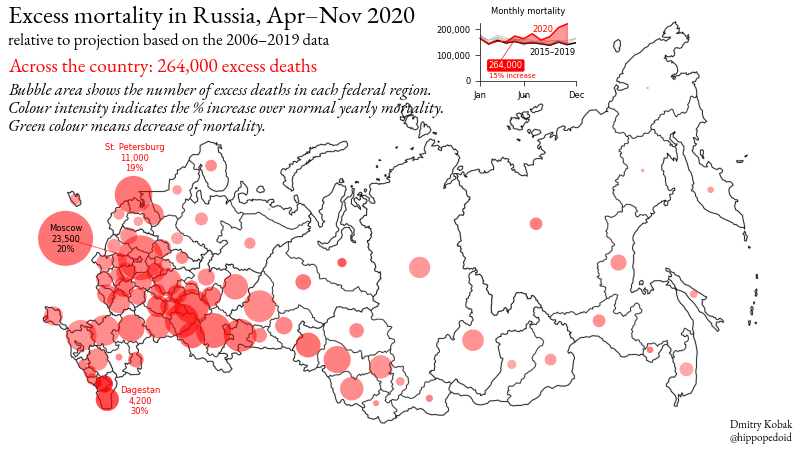

In [31]:
fig, ax1, ax2 = makemap()
maplabels_eng(fig, ax2, highlight=True)
plt.savefig('img/map-eng.png', dpi=200)

<IPython.core.display.Javascript object>


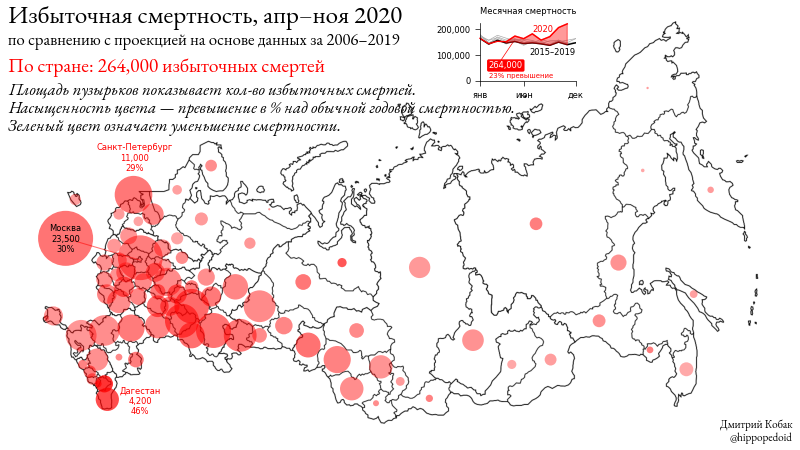

In [32]:
fig, ax1, ax2 = makemap()
maplabels_rus(fig, ax2, highlight=True)
plt.savefig('img/map-rus.png', dpi=200)

In [ ]:
until = np.where(np.isnan(deaths[r,-1,:]))[0][0]

for month in range(-1,until):
    fig, ax1, ax2 = makemap(month)
    maplabels_eng(fig, ax2, highlight=False)
    
    if month>2:
        fig.text(.175,.05, f'{months_eng[month]}:', fontproperties=myfont, size=18, color='red')
        fig.text(.395,.05, f'{np.round(excess[0,month]/1000)*1000:,.0f}', 
             fontproperties=myfont, size=18, color='red', ha='right')
    elif month>=0:
        if excess[0, month]<0:
            fig.text(.175,.05, f'{months_eng[month]}:', fontproperties=myfont, size=18, color='k')
            fig.text(.395,.05, f'−{-np.round(excess[0,month]/1000)*1000:,.0f}', 
                     fontproperties=myfont, size=18, color='k', ha='right')
        else:
            fig.text(.175,.05, f'{months_eng[month]}:', fontproperties=myfont, size=18, color='k')
            fig.text(.395,.05, f'{np.round(excess[0,month]/1000)*1000:,.0f}', 
                     fontproperties=myfont, size=18, color='k', ha='right')

    plt.savefig(f'img/map-eng-{month+1:02d}.png', dpi=75)
    
import subprocess, os
subprocess.call(["convert", "-delay", "100", "-loop", "0", "img/map-eng-*.png", "img/animation-eng.gif"])
for month in range(-1,until):
    os.remove(f'img/map-eng-{month+1:02d}.png')

In [ ]:
until = np.where(np.isnan(deaths[r,-1,:]))[0][0]

for month in range(-1,until):
    fig, ax1, ax2 = makemap(month)
    maplabels_rus(fig, ax2, highlight=False)
    
    if month>2:
        fig.text(.175,.05, f'{months_rus[month]}:', fontproperties=myfont, size=18, color='red')
        fig.text(.395,.05, f'{np.round(excess[0,month]/1000)*1000:,.0f}', 
             fontproperties=myfont, size=18, color='red', ha='right')
    elif month>=0:
        if excess[0, month]<0:
            fig.text(.175,.05, f'{months_rus[month]}:', fontproperties=myfont, size=18, color='k')
            fig.text(.395,.05, f'−{-np.round(excess[0,month]/1000)*1000:,.0f}', 
                     fontproperties=myfont, size=18, color='k', ha='right')
        else:
            fig.text(.175,.05, f'{months_rus[month]}:', fontproperties=myfont, size=18, color='k')
            fig.text(.395,.05, f'{np.round(excess[0,month]/1000)*1000:,.0f}', 
                     fontproperties=myfont, size=18, color='k', ha='right')

    plt.savefig(f'img/map-rus-{month+1:02d}.png', dpi=75)
    
import subprocess, os
subprocess.call(["convert", "-delay", "100", "-loop", "0", "img/map-rus-*.png", "img/animation-rus.gif"])
for month in range(-1,until):
    os.remove(f'img/map-rus-{month+1:02d}.png')

## Top regions

<IPython.core.display.Javascript object>


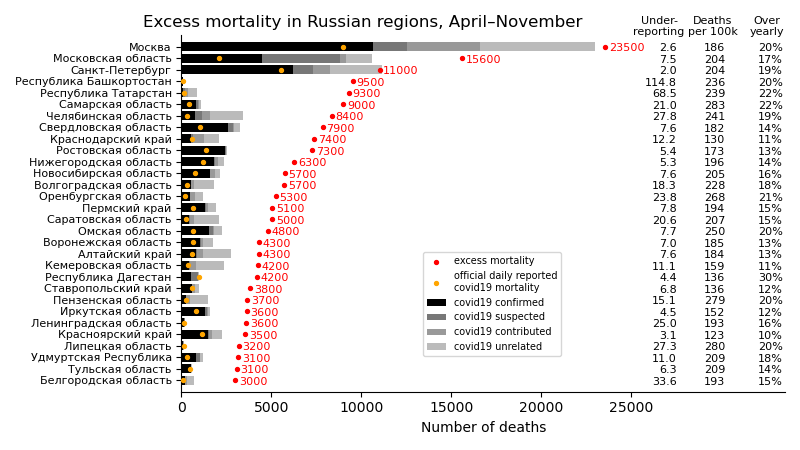

In [35]:
def maketable(n=30, figheight=4.5):
    ind = np.argsort(total[1:])[::-1][:n]
    y1=np.sum(covid_deaths[1:,:,0], axis=1)[ind]
    y2=np.sum(covid_deaths[1:,:,1], axis=1)[ind]
    y3=np.sum(covid_deaths[1:,:,2], axis=1)[ind]
    y4=np.sum(covid_deaths[1:,:,3], axis=1)[ind]
    y5=total[1:][ind]

    plt.figure(figsize=(8,figheight))
    plt.barh(-np.arange(ind.size), y1, color='black', label='covid19 confirmed')
    plt.barh(-np.arange(ind.size), y2, left=y1, color='#777777', label='covid19 suspected')
    plt.barh(-np.arange(ind.size), y3, left=y1+y2, color='#999999', label='covid19 contributed')
    plt.barh(-np.arange(ind.size), y4, left=y1+y2+y3, color='#bbbbbb', label='covid19 unrelated')
    plt.scatter(y5, -np.arange(ind.size), s=8, color='red', label='excess mortality',
                clip_on=False, zorder=4)
    plt.scatter(official_deaths[1:][ind], -np.arange(ind.size), s=8, color='orange', 
                label='official daily reported\ncovid19 mortality', clip_on=False, zorder=3)

    for i,r in enumerate(ind):
        plt.text(y5[i]+200, -i-.4, f'{np.round(y5[i]/100)*100:.0f}', color='red', fontsize=8)
        plt.text(np.max(y5)+4000, -i-.4, f'{y5[i]/official_deaths[1:][ind][i]:.1f}', 
                 color='k', fontsize=8, ha='right').set_clip_on(True)
        plt.text(np.max(y5)+5500, -i-.4, f'{np.round(total_permln[1:][ind][i]/10):.0f}', color='k', fontsize=8).set_clip_on(True)
        plt.text(np.max(y5)+8500, -i-.4, f'{yearratio[1:][ind][i]*100:.0f}%', color='k', fontsize=8).set_clip_on(True)
    plt.text(np.max(y5)+3000, 1, 'Under-\nreporting', fontsize=8, ha='center')
    plt.text(np.max(y5)+6000, 1, 'Deaths\nper 100k', fontsize=8, ha='center')
    plt.text(np.max(y5)+9000, 1, 'Over\nyearly', fontsize=8, ha='center')

    plt.xlim([0,np.max(y5)+10000])
    plt.xticks(np.arange(0,25001,5000))
    plt.ylim([-ind.size,1])
    plt.yticks(-np.arange(ind.size), regions[1:][ind], fontsize=8)
    plt.legend(loc=[.4,.1], fontsize=7)
    plt.title('Excess mortality in Russian regions, April–November', x=.3)
    plt.xlabel('Number of deaths')

    sns.despine()
    plt.tight_layout()

maketable()
plt.savefig('img/regions.png', dpi=200)

## Comparison betwen countries

https://www.nytimes.com/interactive/2020/04/21/world/coronavirus-missing-deaths.html  
https://www.economist.com/graphic-detail/2020/07/15/tracking-covid-19-excess-deaths-across-countries  
https://www.ft.com/content/a2901ce8-5eb7-4633-b89c-cbdf5b386938

Iran:   
https://www.medrxiv.org/content/10.1101/2020.12.07.20245621v1.full

Daily data: https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory#Total_cases_and_deaths

In [36]:
# Now is Dec 29

data = [['United States 🇺🇸', 337678, 'Ec', 'Nov 7', 310576, 233093, 0, 328.2],
        ['Brazil 🇧🇷',        191207, 'Ec','Oct 3', 149128, 145969, 0, 209.5],
        ['India 🇮🇳',         147901, '', '', np.nan, np.nan, 0, 1353], 
        ['Mexico 🇲🇽',        122426, 'Ec', 'Sep 26', 191284, 76227, 0, 126.2],
        ['Italy 🇮🇹',          72370, 'Ec', 'Aug 25', 51554, 34738, 0, 60.4],
        ['United Kingdom 🇬🇧', 71109, 'Ec', 'Nov 13', 72878, 51396, 0, 66.7], # COVID DEATHS FROM OURWORLDINDATA
        ['France 🇫🇷',         63109, 'Ec', 'Nov 10', 44936, 42174, 0, 67.0],
        ['Russia 🇷🇺',         55265, 'DK', 'Nov 30', total[0], official_deaths[0], 0, 142.1],
        ['Iran 🇮🇷',           54814, 'Ghafari et al.', 'Sep 21', 58900, 24301, 0, 81.9], #7931+19460+40851
        ['Spain 🇪🇸',          50122, 'Ec', 'Nov 17', 64709, 41431, 0, 46.7],
        ['Argentina 🇦🇷',      42650, '', '', np.nan, np.nan, 0, 44.5],
        ['Colombia 🇨🇴',       42171, 'NYT', 'Oct 4', 27000, 28787, 0, 49.7],
        ['Peru 🇵🇪',           37474, 'Ec', 'Oct 31', 82076, 34446, 0, 32.0],
        ['Germany 🇩🇪',        31176, 'Ec', 'Oct 20', 9306, 9862, 0, 83.02],
        ['Poland 🇵🇱',         27147, 'NYT', 'Oct', 17500, 5631, 0, 38.0],
        ['South Africa 🇿🇦',   27071, 'Ec', 'Nov 17', 38229, 20406, 0, 57.8],
        ['Indonesia 🇮🇩',      21452, '', '', np.nan, np.nan, 0, 267.7],
        ['Turkey 🇹🇷',         20135, '', '', np.nan, np.nan, 0, 82],
        ['Belgium 🇧🇪',        19200, 'Ec', 'Nov 3', 14008, 12352, 0, 11.5],
        ['Ukraine 🇺🇦',        17849, '', '', np.nan, np.nan, 0, 42.0],
        ['Chile 🇨🇱',          16443, 'Ec', 'Nov 17', 12871, 14839, 0, 18.7],
        ['Romania 🇷🇴',        15334, '', '', np.nan, np.nan, 0, 19.4],
        ['Canada 🇨🇦',         15009, '', '', np.nan, np.nan, 0, 37.6],
        ['Ecuador 🇪🇨',        13992, 'Ec', 'Sep 30', 34067, 11355, 0, 17.08],
        ['Iraq 🇮🇶',           12780, '', '', np.nan, np.nan, 0, 38.4],
        ['Czech Republic 🇨🇿', 11152, '', '', np.nan, np.nan, 0, 10.7],
        ['Netherlands 🇳🇱',    11042, 'Ec', 'Nov 20', 13301, 8805, 0, 17.3],
        ['Pakistan 🇵🇰',        9929, '', '', np.nan, np.nan, 0, 212.2],
        ['Hungary 🇭🇺',         9161, '', '', np.nan, np.nan, 0, 9.8],
        ['Philippines 🇵🇭',     9124, '', '', np.nan, np.nan, 0, 106.7],
        ['Bolivia 🇧🇴',         9098, 'NYT', 'Sep', 25600,7965, 0, 11.4],
       ]

df = pd.DataFrame(data, columns=['Country', 'Covid19 deaths, now', 'Source',
                                 'Mortality data until', 'Excess deaths', 
                                 'Covid19 deaths', 'Underreporting (excess deaths / covid19 deaths)', 
                                 'Population (mln)'])

df['Underreporting (excess deaths / covid19 deaths)'] = df['Excess deaths'] / df['Covid19 deaths']
df['Excess deaths per million'] = df['Excess deaths'] / df['Population (mln)']
df.index += 1

df['Estimated deaths'] = np.maximum(df['Underreporting (excess deaths / covid19 deaths)'],1) * df['Covid19 deaths, now']
df['Estimated deaths per 100,000'] = df['Estimated deaths'] / df['Population (mln)'] / 10

df.style.format({'Underreporting (excess deaths / covid19 deaths)': lambda x: f'{x:.1f}' if ~np.isnan(x) else '', 
                 'Excess deaths':  lambda x: f'{1000*(x/1000).round():,.0f}' if ~np.isnan(x) else '',
                 'Covid19 deaths': lambda x: f'{x:,.0f}' if ~np.isnan(x) else '',
                 'Excess deaths per million': 
                                   lambda x: f'{10*(x/10).round():,.0f}' if ~np.isnan(x) else '',
                 'Population (mln)': '{:.1f}',
                 'Estimated deaths': 
                                   lambda x: f'{1000*(x/1000).round():,.0f}' if ~np.isnan(x) else '',
                 'Estimated deaths per 100,000': 
                                   lambda x: f'{np.round(x):,.0f}' if ~np.isnan(x) else '',
                 'Covid19 deaths, now': '{:,.0f}'}).set_caption(
    'All excess mortality estimates apart from Russia are taken from The Economist. Russia: Dmitry Kobak.').hide_columns(
    ['Population (mln)','Excess deaths per million','Mortality data until','Excess deaths','Covid19 deaths']).set_table_styles(
    [dict(selector='th', props=[('max-width', '180px')])])

# .bar(
#     color='#e50000', vmin=0, subset=['Underreporting'], align='zero').bar(
#     color='#e50000', vmin=0, subset=['Excess deaths per million'], align='zero')v

,Country,"Covid19 deaths, now",Source,Underreporting (excess deaths / covid19 deaths),Estimated deaths,"Estimated deaths per 100,000"
1,United States 🇺🇸,"337,678",Ec,1.3,"450,000",137
2,Brazil 🇧🇷,"191,207",Ec,1.0,"195,000",93
3,India 🇮🇳,"147,901",,,,
4,Mexico 🇲🇽,"122,426",Ec,2.5,"307,000",243
5,Italy 🇮🇹,"72,370",Ec,1.5,"107,000",178
6,United Kingdom 🇬🇧,"71,109",Ec,1.4,"101,000",151
7,France 🇫🇷,"63,109",Ec,1.1,"67,000",100
8,Russia 🇷🇺,"55,265",DK,6.5,"361,000",254
9,Iran 🇮🇷,"54,814",Ghafari et al.,2.4,"133,000",162
10,Spain 🇪🇸,"50,122",Ec,1.6,"78,000",168


<IPython.core.display.Javascript object>


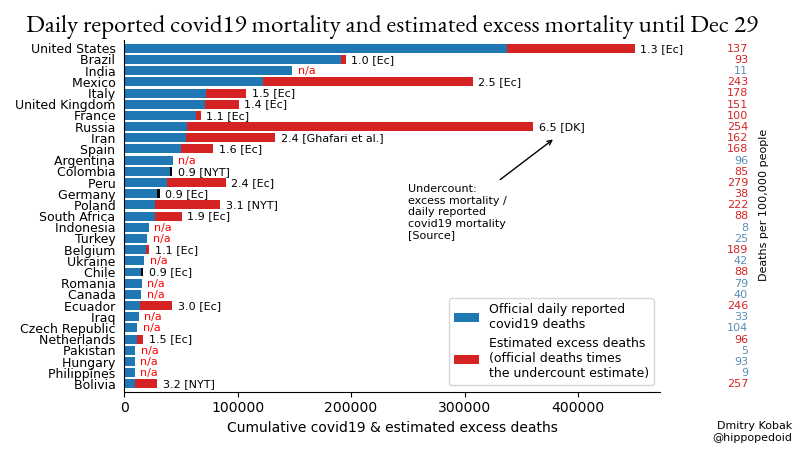

In [37]:
from matplotlib import font_manager as fm
myfont = fm.FontProperties(fname='fonts/static/EBGaramond-Regular.ttf')

fig = plt.figure(figsize=(8, 4.5))

plt.barh(-np.arange(df.shape[0]), df['Covid19 deaths, now'], label='Official daily reported\ncovid19 deaths')
delta = df['Estimated deaths'] - df['Covid19 deaths, now']
delta[delta<0] = 0
plt.barh(-np.arange(df.shape[0]), delta, left=df['Covid19 deaths, now'], color='#d52323',
         label='Estimated excess deaths\n(official deaths times\nthe undercount estimate)')
         
plt.yticks(-np.arange(df.shape[0]), [a[:-2] for a in df['Country']], fontsize=9)
plt.xlabel('Cumulative covid19 & estimated excess deaths')

for i in np.where(delta==0)[0]:
    plt.barh(-i, 2000, left=np.array(df['Covid19 deaths, now'])[i]-2000, color='k')
for i in np.where(np.isnan(delta))[0]:
    plt.text(np.array(df['Covid19 deaths, now'])[i] + 5000, -i-.3, 'n/a', color='r', fontsize=8)
for i in range(df.shape[0]):
    if np.isnan(df['Estimated deaths'].values[i]):
        plt.text(550000, -i-.3, 
             f"{df['Covid19 deaths, now'].values[i]/df['Population (mln)'].values[i]/10:.0f}",
             color='#598fb4', ha='right', fontsize=8)
        continue
    plt.text(df['Estimated deaths'].values[i] + 5000, -i-.3, 
             f"{df['Underreporting (excess deaths / covid19 deaths)'].values[i]:.1f} [{df['Source'].values[i]}]",
             color='k', fontsize=8)
    plt.text(550000, -i-.3, 
             f"{df['Estimated deaths per 100,000'].values[i]:.0f}",
             color='#d52323', ha='right', fontsize=8)
    
plt.title('Daily reported covid19 mortality and estimated excess mortality until Dec 29', 
          fontproperties=myfont, fontsize=18)

plt.gca().tick_params(axis='y', length=0)

plt.gca().annotate('Undercount:\nexcess mortality /\ndaily reported\ncovid19 mortality\n[Source]',
                   xy=(380000, -8), xycoords='data',
                   xytext=(250000, -17), textcoords='data',
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                   fontsize=8)

plt.text(560000,-14,'Deaths per 100,000 people', rotation=90, va='center', fontsize=8)

plt.ylim([-df.shape[0]+.3,.7])
# plt.xlim([0,370000])

sns.despine()
plt.tight_layout()

plt.legend(loc='lower right', fontsize=9)

fig.text(.99,.02, 'Dmitry Kobak\n@hippopedoid', size=8, ha='right')

plt.savefig('img/countries.png', dpi=200)